<div style="background:#5DADE2;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h4 style="color:#fff"><font size="8">Análisis de las Paso 2023</font></h4>
    </strong>
</div>
<br>
<!-- Agrega la imagen justo aquí debajo del título -->
<img src="https://transparenciaelectoral.org/wp-content/uploads/2023/08/6495eecda3b9f_1280_853.jpg" alt="Imagen: El Cronista"" style="max-width: 100%;">
<br>
<p>Las elecciones primarias argentinas, también llamadas PASO (Primarias, Abiertas, Simultáneas y Obligatorias) fueron creadas en el 2009, tras la aprobación de la Ley N.º 26.571. En ellas se definen básicamente dos cuestiones: qué partidos están habilitados a presentarse a las elecciones nacionales, que según la ley son aquellos que obtengan al menos el 3 % de los votos válidamente emitidos en el distrito de que se trate para la respectiva categoría. También quedará definida la lista que representará a cada partido político, de ahí lo de interna abierta.</p>





<div style="background:#c72e57;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h4 style = "color:#fff"><font size = 5>1.Importaciones de librerias</font></h4>
    </strong>
</div><br>

In [19]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import  LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from pyod.models.knn import KNN
import plotly.express as px
from scipy.stats import shapiro
import matplotlib.ticker as mtick

import geopandas as gpd


import folium 
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import branca 
import seaborn as sns
import numpy as np
from folium.plugins import StripePattern
import geopandas as gpd

<div style="background:#c72e57;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h4 style = "color:#fff"><font size = 5>2. Análisis Exploratorio de datos</font></h4>
    </strong>
</div><br>

<div style="background:#2980B9;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h4 style = "color:#fff"><font size = 5>Carga de los datos</font></h4>
    </strong>
</div><br>

In [20]:
df = pd.read_csv('C:/Users/zukan/OneDrive/Escritorio/TP FINAL MODULO ULTIMO/Argentina_2023_Elections-main/Jupyter Notebooks/Elections Data/General Elections/csv/ResultadosElectorales_2023.csv')

C:\Users\zukan\AppData\Local\Temp\ipykernel_13776\2381411678.py:1: DtypeWarning: Columns (7,10,11,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/zukan/OneDrive/Escritorio/TP FINAL MODULO ULTIMO/Argentina_2023_Elections-main/Jupyter Notebooks/Elections Data/General Elections/csv/ResultadosElectorales_2023.csv')


<div style="background:#2980B9;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h4 style = "color:#fff"><font size = 5>Exploramos la información</font></h4>
    </strong>
</div><br> 

In [21]:
df.head()

,año,eleccion_tipo,recuento_tipo,padron_tipo,distrito_id,distrito_nombre,seccionprovincial_id,seccionprovincial_nombre,seccion_id,seccion_nombre,...,mesa_tipo,mesa_electores,cargo_id,cargo_nombre,agrupacion_id,agrupacion_nombre,lista_numero,lista_nombre,votos_tipo,votos_cantidad
0,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,...,NATIVOS,343,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,NULO,0
1,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,...,NATIVOS,343,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,IMPUGNADO,0
2,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,...,NATIVOS,343,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,RECURRIDO,0
3,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,...,NATIVOS,343,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,COMANDO,0
4,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,...,NATIVOS,349,1,PRESIDENTE Y VICE,134,UNION POR LA PATRIA,NaN,NaN,POSITIVO,95


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5868102 entries, 0 to 5868101
Data columns (total 23 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   año                       int64  
 1   eleccion_tipo             object 
 2   recuento_tipo             object 
 3   padron_tipo               object 
 4   distrito_id               int64  
 5   distrito_nombre           object 
 6   seccionprovincial_id      int64  
 7   seccionprovincial_nombre  object 
 8   seccion_id                int64  
 9   seccion_nombre            object 
 10  circuito_id               object 
 11  circuito_nombre           object 
 12  mesa_id                   int64  
 13  mesa_tipo                 object 
 14  mesa_electores            int64  
 15  cargo_id                  int64  
 16  cargo_nombre              object 
 17  agrupacion_id             int64  
 18  agrupacion_nombre         object 
 19  lista_numero              float64
 20  lista_nombre            

In [23]:
df.columns.tolist()

['año',
 'eleccion_tipo',
 'recuento_tipo',
 'padron_tipo',
 'distrito_id',
 'distrito_nombre',
 'seccionprovincial_id',
 'seccionprovincial_nombre',
 'seccion_id',
 'seccion_nombre',
 'circuito_id',
 'circuito_nombre',
 'mesa_id',
 'mesa_tipo',
 'mesa_electores',
 'cargo_id',
 'cargo_nombre',
 'agrupacion_id',
 'agrupacion_nombre',
 'lista_numero',
 'lista_nombre',
 'votos_tipo',
 'votos_cantidad']

In [24]:
df.shape

(5868102, 23)

<div style="background:#c72e57;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h4 style = "color:#fff"><font size = 5>3. Análisis Exploratorio de Datos </font></h4>
    </strong>
</div><br> 

In [25]:
df.isna().sum()

año                               0
eleccion_tipo                     0
recuento_tipo                     0
padron_tipo                       0
distrito_id                       0
distrito_nombre                   0
seccionprovincial_id              0
seccionprovincial_nombre    2664331
seccion_id                        0
seccion_nombre                    0
circuito_id                       0
circuito_nombre                   0
mesa_id                           0
mesa_tipo                         0
mesa_electores                    0
cargo_id                          0
cargo_nombre                      0
agrupacion_id                     0
agrupacion_nombre           3104670
lista_numero                2710180
lista_nombre                5814850
votos_tipo                        0
votos_cantidad                    0
dtype: int64

<body>
<dt> <strong> Consideraciones preliminares:</strong></dt>
<ul>
<li type="disc">seccionprovincial_nombre tiene 2664331 NA values</li>
<li type="disc">Tenemos a seccionprovincial_id que tiene 0 NA values, entonces podemos usar seccionprovincial_nombre</li>
<li type="disc">Luego con agrupacion_nombre, mirando el dataframe podemos ver que cuando votos_tipo es "BLANCO", "NULO", "COMANDO", "IMPUGNADO" o "RECURRIDO", agrupacion_nombre es NA, entonces esos NA values no tienen porque ser una preocupación.</li>
<li type="disc">Con respecto a lista_nombre y lista_numero, son características que no me importan dado que solo voy a analizar los resultados de las elecciones presidenciales.</li>
</ul>
</body>


<div style="background:#c72e57;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h4 style = "color:#fff"><font size = 5>4. Limpieza y transformación de los datos </font></h4>
    </strong>
</div><br> 

In [26]:
df_presidente = df[df['cargo_nombre'] == 'PRESIDENTE Y VICE']

<body>
<dt> <strong> Consideraciones:</strong></dt>
<ul>
<li type="disc">Dado que cada "mesa" está identificada por ciertos valores (distrito_nombre/distrito_id + seccion_nombre/seccion_id + circuito_id + mesa_id)</li>
<li type="disc">creamos una nueva columna llamada 'id_mesa' en un DataFrame llamado df_presidente. Esta columna se está formando concatenando las columnas existentes 'distrito_id', 'seccion_id', 'circuito_id', y 'mesa_id', todas convertidas a cadenas (str)</li>
<li type="disc">La concatenación se realiza utilizando el carácter '-' como separador. La idea es crear un identificador único para cada mesa, basado en la combinación de las columnas mencionadas anteriormente</li>
</ul>
</body>

In [27]:
df_presidente['id_mesa'] = df_presidente['distrito_id'].astype(str)+'-'+df_presidente['seccion_id'].astype(str)+'-'+df_presidente['circuito_id'].astype(str)+'-'+df_presidente['mesa_id'].astype(str)
#En la página oficial del gobierno dice que el número total de mesas fue 104520, así que revisemos que tenemos el mismo número.
print('NÚmero de mesas:', len(df_presidente['id_mesa'].unique()))

NÚmero de mesas: 104520


C:\Users\zukan\AppData\Local\Temp\ipykernel_13776\2468445601.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_presidente['id_mesa'] = df_presidente['distrito_id'].astype(str)+'-'+df_presidente['seccion_id'].astype(str)+'-'+df_presidente['circuito_id'].astype(str)+'-'+df_presidente['mesa_id'].astype(str)


In [28]:
#Creamos un nuevo data frame que contiene solo las columnas que quedan
df_presi = df_presidente.drop(['año',
                          'eleccion_tipo',
                          'recuento_tipo',
                          'padron_tipo',
                          'seccionprovincial_nombre',
                          'seccion_nombre',
                          'mesa_tipo',
                          'circuito_nombre',
                          'seccionprovincial_id',
                          'circuito_id',
                          'mesa_id',
                          'seccion_id',
                          'cargo_id',
                          'lista_numero',
                          'lista_nombre',
                          'cargo_nombre',
                          'distrito_id',
                          ],
                         axis = 1)
#está seleccionando un subconjunto específico de columnas del DataFrame df_presi y creando un nuevo DataFrame con esas columnas.
df_presi = df_presi[['distrito_nombre','id_mesa','mesa_electores','agrupacion_nombre','agrupacion_id','votos_tipo','votos_cantidad']]

df_presi= df_presi.sort_values(['distrito_nombre','id_mesa']).reset_index(drop=True)


In [29]:
#Simplificamos los nombres de las agrupaciones políticas en la columna 'agrupacion_nombre' del DataFrame, específicamente cambiando:
# 'FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD' por 'FRENTE DE IZQUIERDA'
df_presi['agrupacion_nombre'] = df_presi['agrupacion_nombre'].replace(['FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD'], 'FRENTE DE IZQUIERDA')

In [30]:
df_presi.head()

,distrito_nombre,id_mesa,mesa_electores,agrupacion_nombre,agrupacion_id,votos_tipo,votos_cantidad
0,Buenos Aires,2-1-00001-1,350,JUNTOS POR EL CAMBIO,132,POSITIVO,91
1,Buenos Aires,2-1-00001-1,350,LA LIBERTAD AVANZA,135,POSITIVO,80
2,Buenos Aires,2-1-00001-1,350,UNION POR LA PATRIA,134,POSITIVO,67
3,Buenos Aires,2-1-00001-1,350,HACEMOS POR NUESTRO PAIS,133,POSITIVO,18
4,Buenos Aires,2-1-00001-1,350,FRENTE DE IZQUIERDA,136,POSITIVO,8


<div style="background:#c72e57;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h4 style = "color:#fff"><font size = 5>5. Resultados de las elecciones </font></h4>
    </strong>
</div><br> 

<div style="background:#2980B9;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
<strong>
        <h4 style = "color:#fff"><font size = 5>Cantidad de votos por agrupación </font></h4>
  </strong>
</div><br>

In [16]:
#Realizamos un análisis de los votos por agrupación política, agrupa los datos, suma los votos para cada agrupación, 
#los ordena en orden descendente y calcula el total de votos emitidos para todas las agrupaciones.

agrupacion_votos = df_presi.groupby('agrupacion_nombre')['votos_cantidad'].sum().reset_index()
agrupacion_votos = agrupacion_votos.sort_values('votos_cantidad', ascending=False)
# Total votes that voted an agrupation
total_votes = agrupacion_votos['votos_cantidad'].sum()
agrupacion_votos 


,agrupacion_nombre,votos_cantidad
4,UNION POR LA PATRIA,9645983
3,LA LIBERTAD AVANZA,7884336
2,JUNTOS POR EL CAMBIO,6267152
1,HACEMOS POR NUESTRO PAIS,1784315
0,FRENTE DE IZQUIERDA,709932


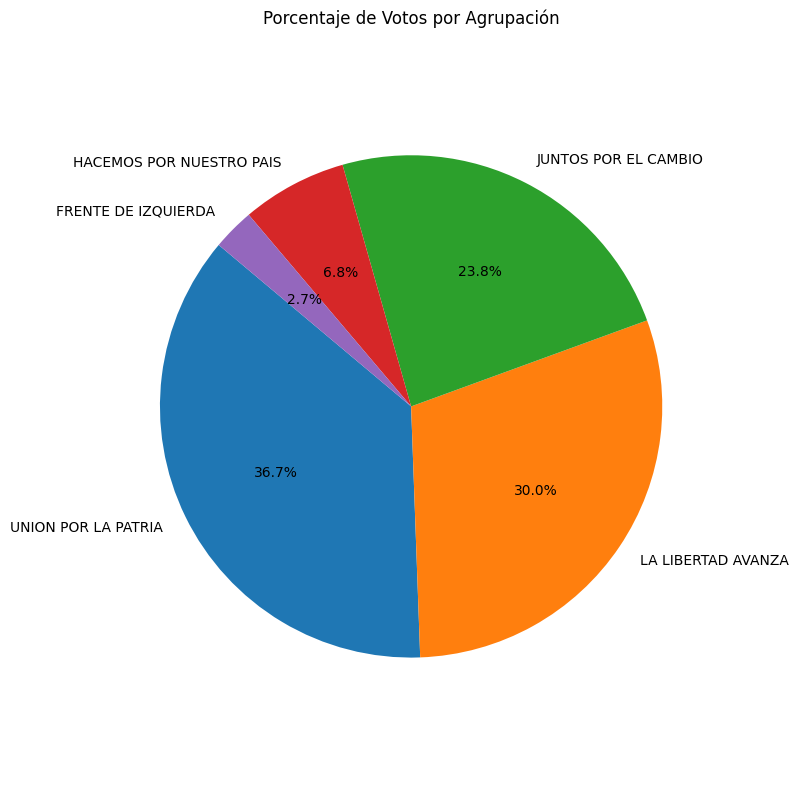

In [17]:
import matplotlib.pyplot as plt

# Gráfico de torta de la suma de votos por agrupación
plt.figure(figsize=(8, 8))
plt.pie(agrupacion_votos['votos_cantidad'], labels=agrupacion_votos['agrupacion_nombre'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio para asegurar una torta circular
plt.title('Porcentaje de Votos por Agrupación')
plt.tight_layout()
plt.show()


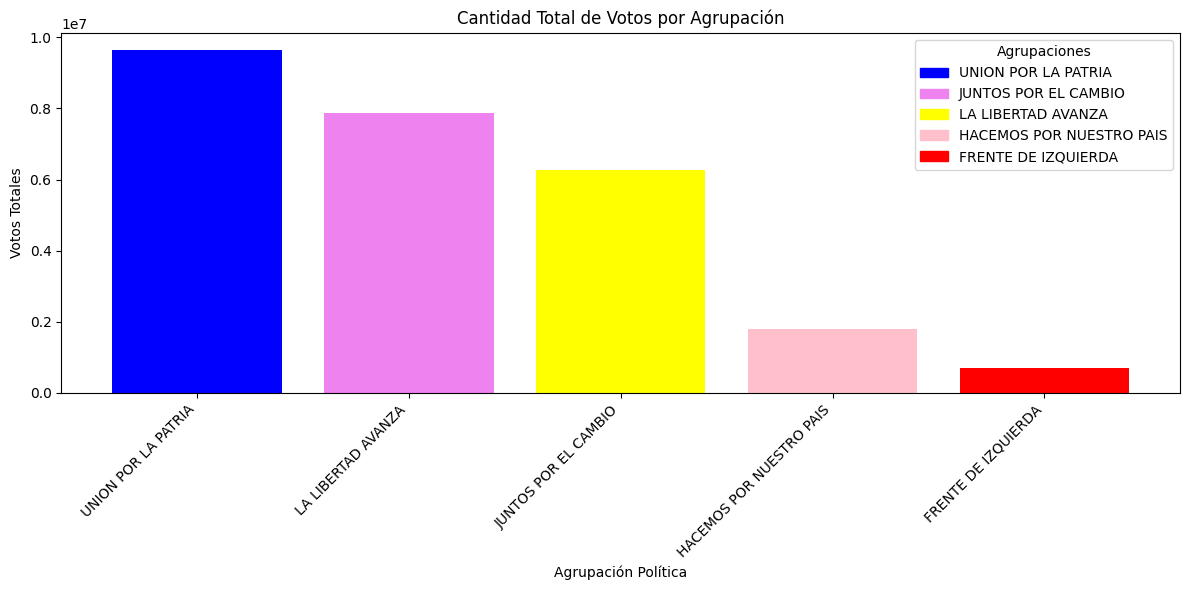

In [18]:
# Datos para el gráfico de barras
agrupaciones = agrupacion_votos['agrupacion_nombre']
votos_totales = agrupacion_votos['votos_cantidad']

# Colores para cada agrupación
colores = {'UNION POR LA PATRIA': 'blue' ,'JUNTOS POR EL CAMBIO': 'yellow', 'LA LIBERTAD AVANZA': 'violet', 'HACEMOS POR NUESTRO PAIS': 'pink','FRENTE DE IZQUIERDA': 'red'}

# Crear el gráfico de barras con colores específicos
plt.figure(figsize=(12, 6))
bars = plt.bar(agrupaciones, votos_totales, color=[colores[agrupacion] for agrupacion in agrupaciones])

# Configurar el gráfico
plt.title('Cantidad Total de Votos por Agrupación')
plt.xlabel('Agrupación Política')
plt.ylabel('Votos Totales')
plt.xticks(rotation=45, ha='right')

# Añadir leyenda de colores
legend_labels = [plt.Rectangle((0,0),1,1, color=colores[agrupacion]) for agrupacion in agrupaciones]
plt.legend(legend_labels, colores.keys(), title='Agrupaciones', loc='upper right')

plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [19]:
dn_votos_sun = df_presi.groupby(['distrito_nombre','agrupacion_nombre'], as_index=False)['votos_cantidad'].sum()
dn_votos_sun.sample(5)

,distrito_nombre,agrupacion_nombre,votos_cantidad
119,Tucumán,UNION POR LA PATRIA,471145
14,Chaco,UNION POR LA PATRIA,310962
9,Catamarca,UNION POR LA PATRIA,99612
27,Corrientes,JUNTOS POR EL CAMBIO,224519
12,Chaco,JUNTOS POR EL CAMBIO,171756


In [20]:
dn_mesas_votos = df_presidente.groupby(by=['distrito_nombre','mesa_id','agrupacion_nombre'], as_index=False)['votos_cantidad'].sum()
dn_mesas_votos.sample(5)

,distrito_nombre,mesa_id,agrupacion_nombre,votos_cantidad
313747,Santiago del Estero,204,JUNTOS POR EL CAMBIO,25
338471,Tucumán,2174,HACEMOS POR NUESTRO PAIS,14
243973,Salta,2906,LA LIBERTAD AVANZA,104
319810,Santiago del Estero,1417,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,0
217651,Neuquén,99,HACEMOS POR NUESTRO PAIS,10


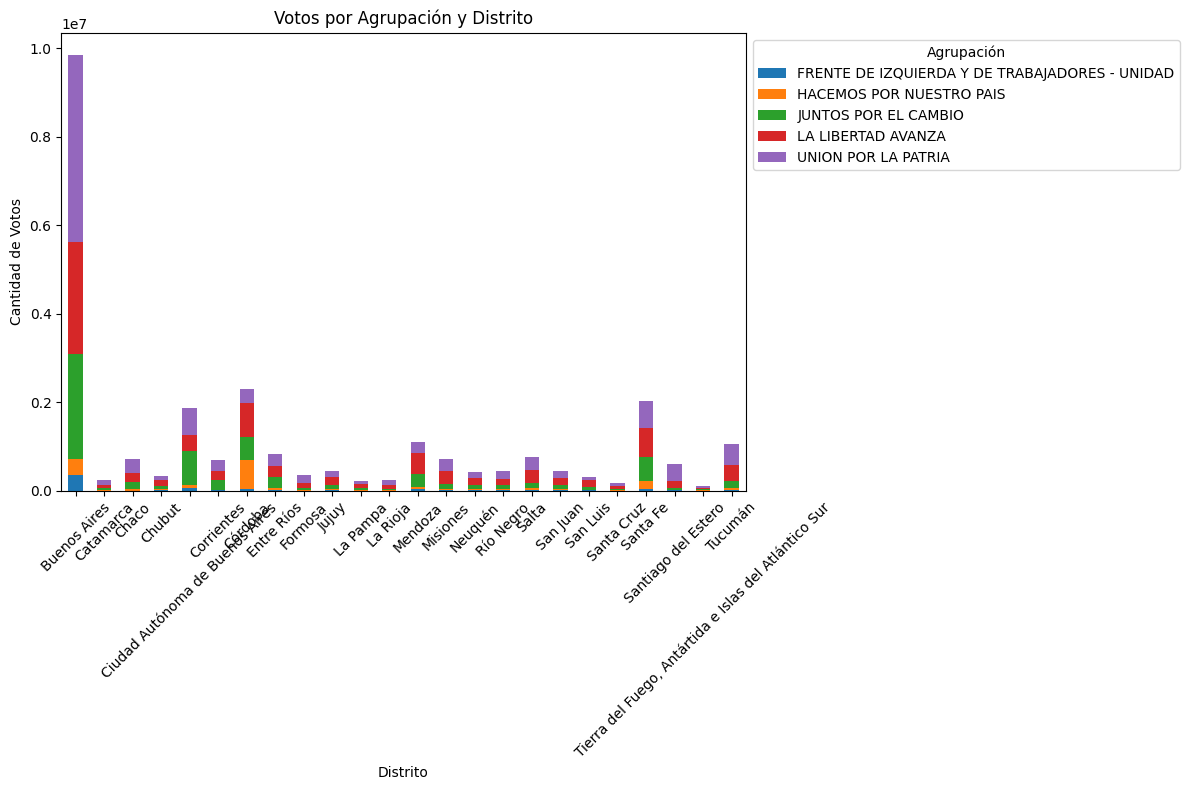

In [21]:

import matplotlib.pyplot as plt

# Suponiendo que tienes tu dataframe dn_mesas_votos con la estructura que mencionaste

# Agrupar por distrito y agrupación para obtener la suma de votos por cada combinación
votos_por_distrito = dn_mesas_votos.groupby(['distrito_nombre', 'agrupacion_nombre'])['votos_cantidad'].sum().unstack()

# Crear el gráfico de barras apiladas
votos_por_distrito.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Distrito')
plt.ylabel('Cantidad de Votos')
plt.title('Votos por Agrupación y Distrito')
plt.legend(title='Agrupación', bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





<div style="background:#2980B9;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
<strong>
        <h4 style = "color:#fff"><font size = 5>Cantidad de votos que cada Provincia aportó a la elección </font></h4>
  </strong>
</div><br>

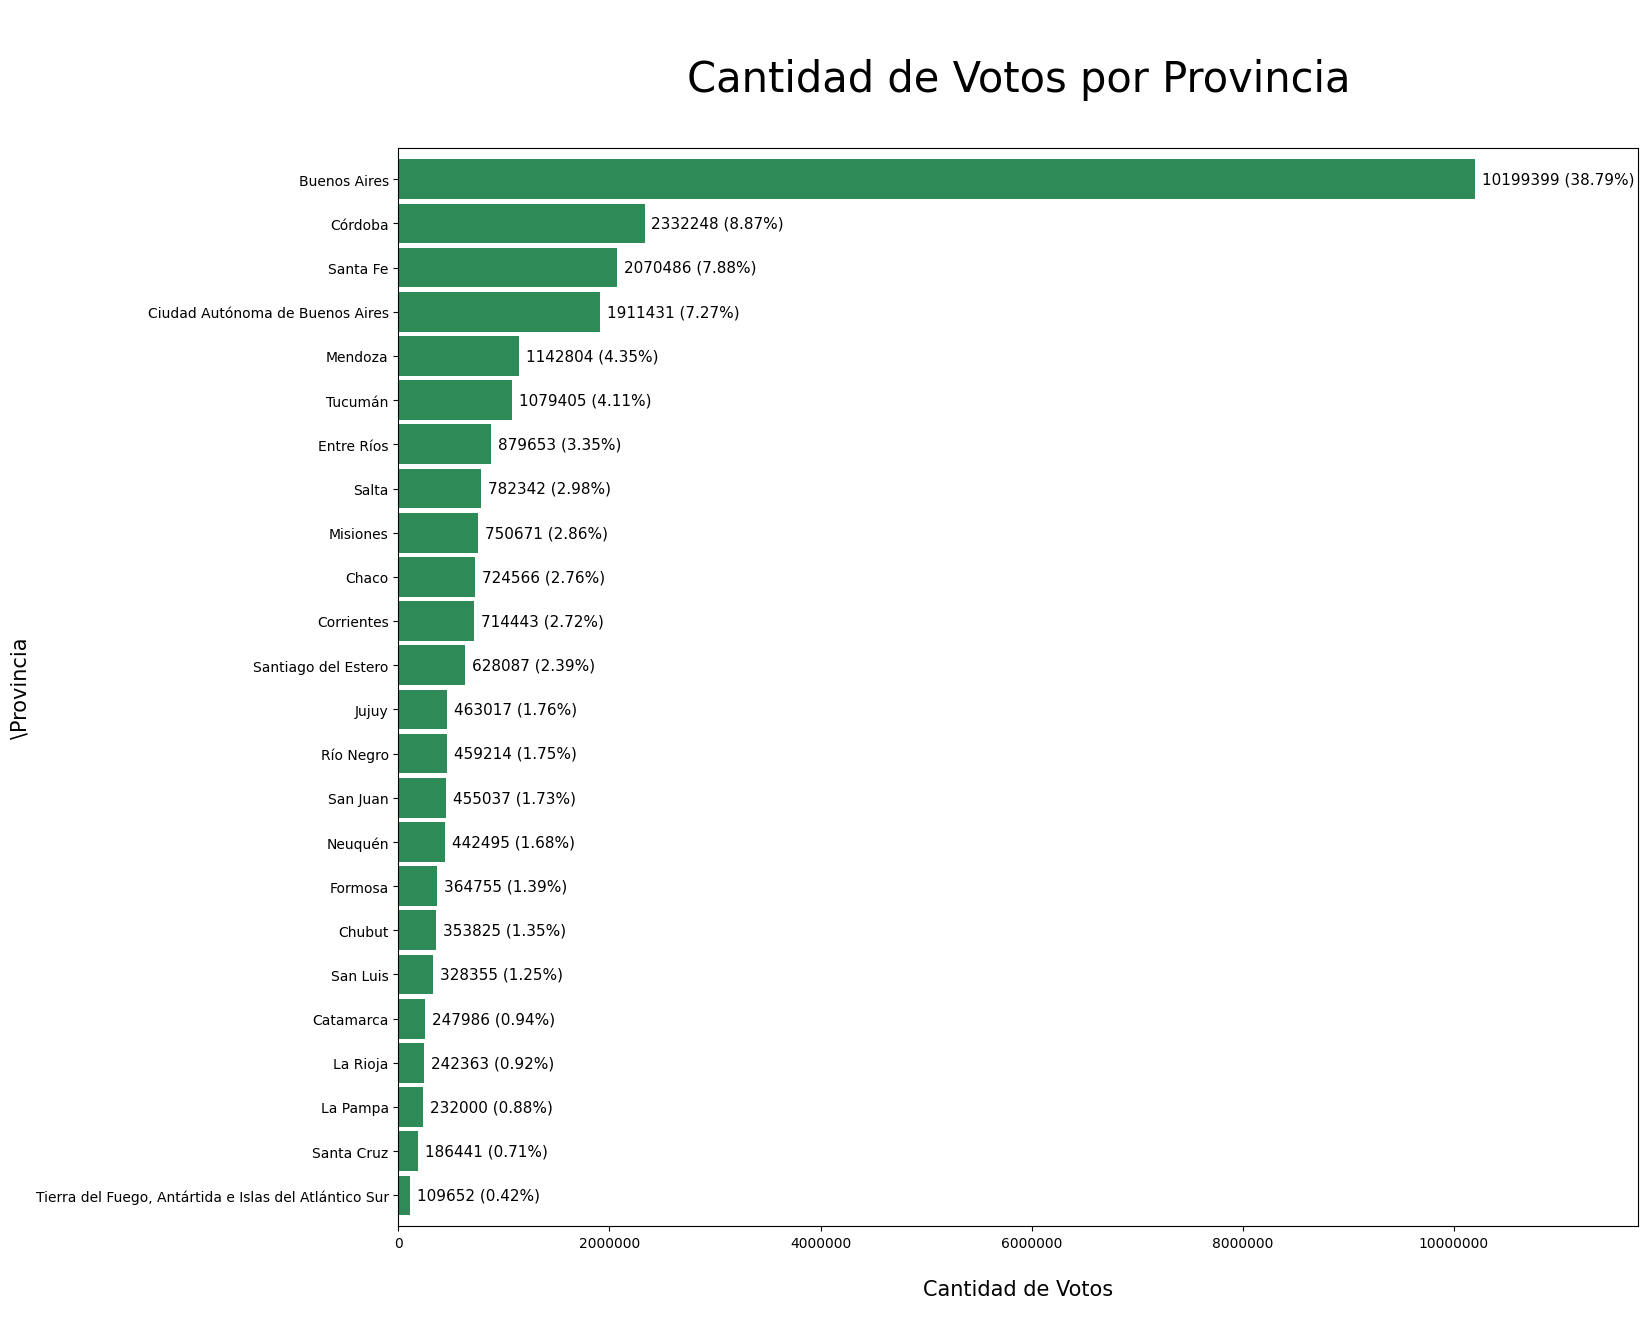

Cantidad de votos en todo el país: 27100675


In [22]:
resultado = df_presi.groupby('distrito_nombre')['votos_cantidad'].sum().reset_index()
resultado = resultado.set_index(['distrito_nombre'])
resultado = resultado.sort_values(['votos_cantidad'],ascending=True)

chart = resultado.plot(kind='barh', figsize=(16, 14), width=0.9, color='seagreen')
for container in chart.containers:
    chart.bar_label(container, fontsize=11, padding=5, labels=[f'{val} ({val/total_votes*100:.2f}%)' for val in container.datavalues])
    
plt.title('\nCantidad de Votos por Provincia\n', fontsize=30)
plt.xlabel('\nCantidad de Votos\n', fontsize=15)
plt.ylabel('\Provincia', fontsize=15)
plt.ticklabel_format(axis="x", style="plain")
chart.set_xlim(0, 11750000)

plt.legend().set_visible(False)
plt.show()

total_votes = resultado['votos_cantidad'].sum()
print('Cantidad de votos en todo el país:', total_votes)

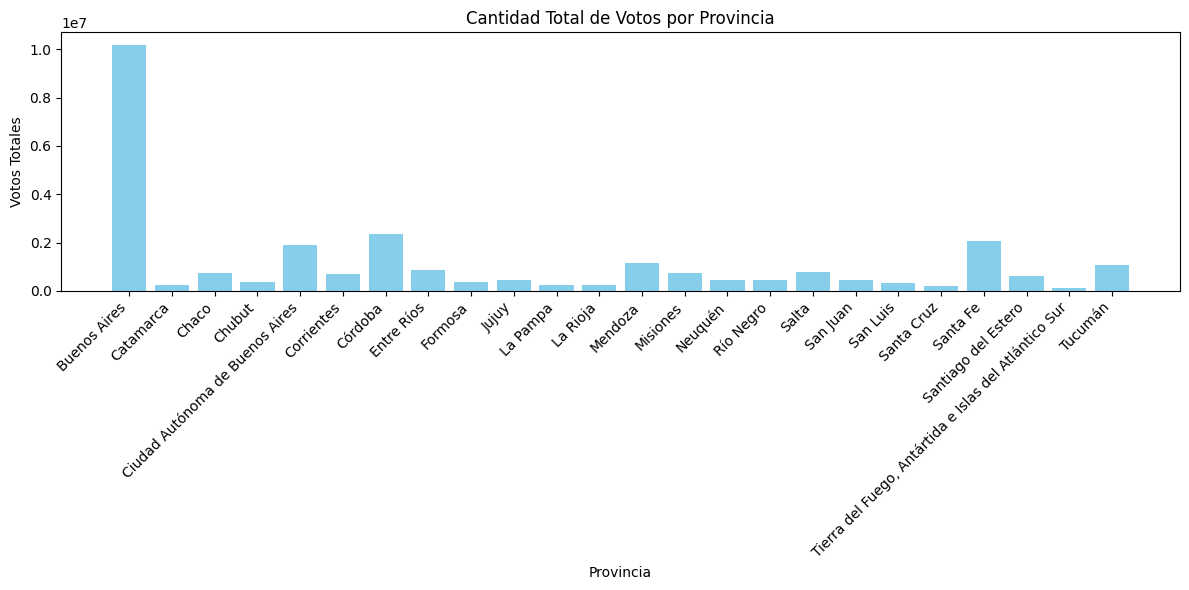

In [23]:
import matplotlib.pyplot as plt

# 'distrito_nombre' es la columna que representa las provincias
provincia_votes = df_presi.groupby('distrito_nombre')['votos_cantidad'].sum().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(provincia_votes['distrito_nombre'], provincia_votes['votos_cantidad'], color='skyblue')

# Configurar el gráfico
plt.title('Cantidad Total de Votos por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Votos Totales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar el gráfico
plt.show()


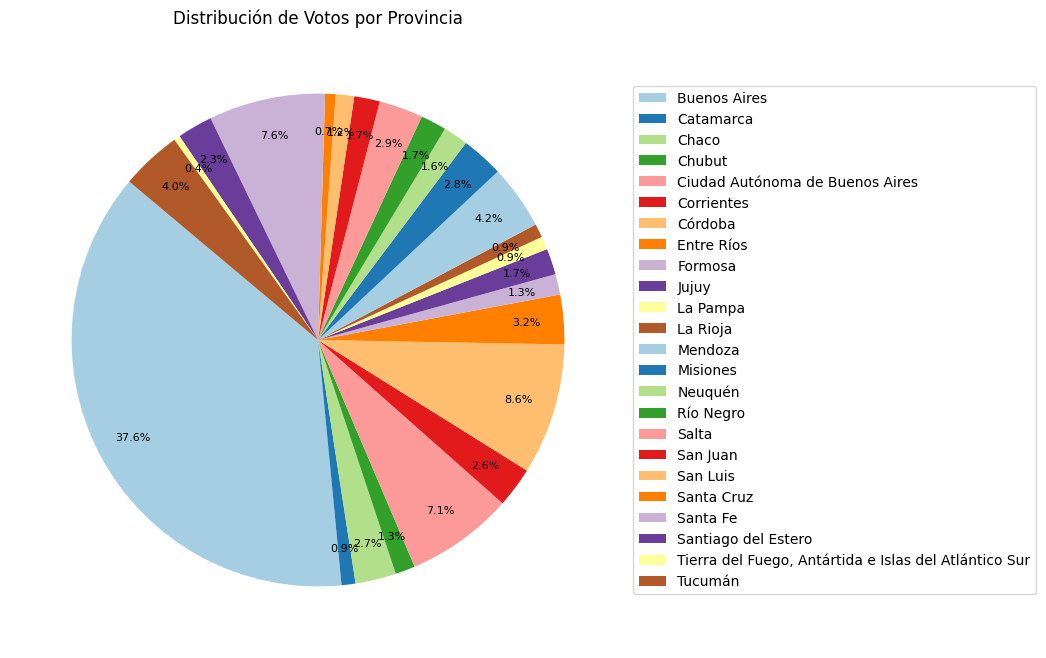

In [24]:

# 'distrito_nombre' es la columna que representa las provincias
provincia_votes = df_presi.groupby('distrito_nombre')['votos_cantidad'].sum().reset_index()

# Crear el gráfico de torta
plt.figure(figsize=(8, 8))
pie = plt.pie(provincia_votes['votos_cantidad'], labels=None, autopct='%.1f%%', startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors, textprops={'fontsize': 8})

# Configurar el gráfico
plt.title('Distribución de Votos por Provincia')

# Crear leyenda
plt.legend(provincia_votes['distrito_nombre'], loc='center left', bbox_to_anchor=(1, 0.5))

# Mostrar el gráfico
plt.show()



<div style="background:#2980B9;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
<strong>
        <h4 style = "color:#fff"><font size = 5>Porcentaje de cada agrupación en cada provincia y también cuántos puntos obtuvo la agrupación en esa provincia </font></h4>
  </strong>
</div><br>

In [30]:

# 'distrito_nombre' es la columna que representa las provincias
# y 'agrupacion_nombre' es la columna que representa las agrupaciones políticas
# y 'votos_cantidad' es la columna que representa la cantidad de votos
pivot_table = pd.pivot_table(df_presi, values='votos_cantidad', index='distrito_nombre', columns='agrupacion_nombre', aggfunc='sum', fill_value=0)

# Calcular el porcentaje que cada agrupación obtuvo en cada provincia
porcentaje_por_provincia = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Dar formato a las tablas para resaltar ciertos valores
styled_pivot_table = pivot_table.style.background_gradient(cmap='Blues').format('{:.0f}')
styled_porcentaje_por_provincia = porcentaje_por_provincia.style.background_gradient(cmap='Blues').format('{:.2f}%')

# Mostrar el resultado
print("Cantidad de Votos por Provincia y Agrupación:")
display(styled_pivot_table)
print("\nPorcentaje de Votos por Provincia y Agrupación:")
display(styled_porcentaje_por_provincia)

Cantidad de Votos por Provincia y Agrupación:


agrupacion_nombre,FRENTE DE IZQUIERDA,HACEMOS POR NUESTRO PAIS,JUNTOS POR EL CAMBIO,LA LIBERTAD AVANZA,UNION POR LA PATRIA
distrito_nombre,,,,,
Buenos Aires,352790,367457,2374023,2533633,4224688
Catamarca,3666,14967,39960,74570,99612
Chaco,5482,25804,171756,197596,310962
Chubut,15122,26555,70717,120297,110820
Ciudad Autónoma de Buenos Aires,66145,57607,767367,369424,600832
Corrientes,7315,19118,224519,187916,260040
Córdoba,31895,665717,519252,769847,308016
Entre Ríos,12760,44720,250512,247640,276850
Formosa,2772,8793,55097,103911,187229



Porcentaje de Votos por Provincia y Agrupación:


agrupacion_nombre,FRENTE DE IZQUIERDA,HACEMOS POR NUESTRO PAIS,JUNTOS POR EL CAMBIO,LA LIBERTAD AVANZA,UNION POR LA PATRIA
distrito_nombre,,,,,
Buenos Aires,3.58%,3.73%,24.10%,25.72%,42.88%
Catamarca,1.57%,6.43%,17.17%,32.04%,42.79%
Chaco,0.77%,3.63%,24.14%,27.77%,43.70%
Chubut,4.40%,7.73%,20.59%,35.02%,32.26%
Ciudad Autónoma de Buenos Aires,3.55%,3.09%,41.23%,19.85%,32.28%
Corrientes,1.05%,2.74%,32.12%,26.89%,37.21%
Córdoba,1.39%,29.01%,22.63%,33.55%,13.42%
Entre Ríos,1.53%,5.37%,30.09%,29.75%,33.26%
Formosa,0.77%,2.46%,15.40%,29.04%,52.33%


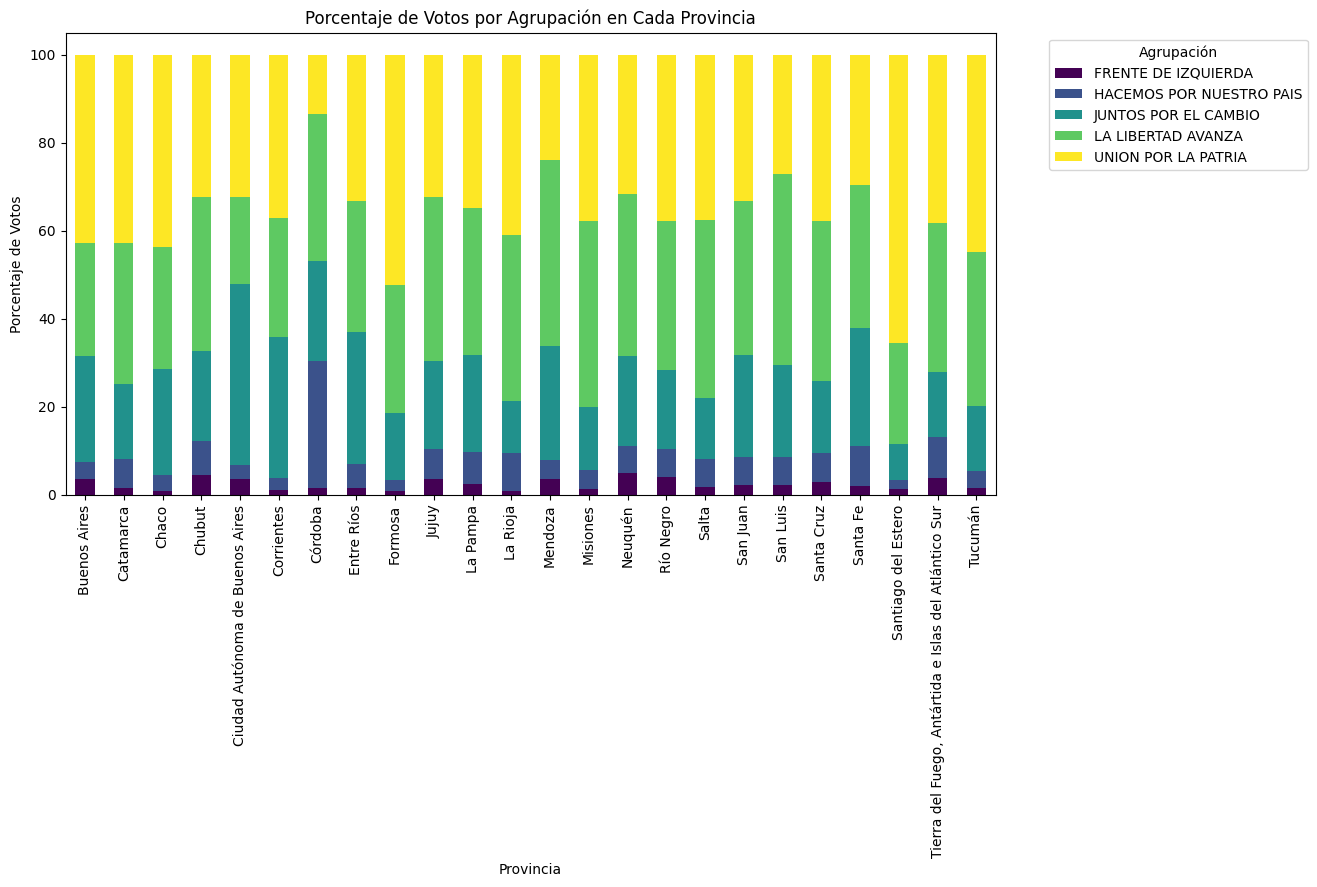

In [31]:

pivot_table = pd.pivot_table(df_presi, values='votos_cantidad', index='distrito_nombre', columns='agrupacion_nombre', aggfunc='sum', fill_value=0)

# Calcular el porcentaje que cada agrupación obtuvo en cada provincia
porcentaje_por_provincia = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Crear el gráfico de barras apiladas
ax = porcentaje_por_provincia.plot(kind='bar', stacked=True, figsize=(12, 6), cmap='viridis')

# Configurar el gráfico
plt.title('Porcentaje de Votos por Agrupación en Cada Provincia')
plt.xlabel('Provincia')
plt.ylabel('Porcentaje de Votos')
plt.legend(title='Agrupación', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()


In [32]:
results = df_presi[['distrito_nombre','agrupacion_nombre','votos_cantidad']]
results = round(results.groupby(['distrito_nombre','agrupacion_nombre'])['votos_cantidad'].sum().unstack(fill_value=0),3)

votes_province = results.sum(axis=1).reset_index().sort_values(0, ascending=True)
votes_province_index = votes_province.iloc[:,0].tolist()

results = results.loc[votes_province_index]
results_index = results.reset_index().index.tolist()
for provincia in results_index:
    results.iloc[provincia,:] = round(results.iloc[provincia,:].div(results.iloc[provincia,:].sum(axis=0),axis=0),4)*100

<div style="background:#2980B9;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
<strong>
        <h4 style = "color:#fff"><font size = 5>Resultados por agrupación: Unión por la Patria</font></h4>
  </strong>
</div><br>

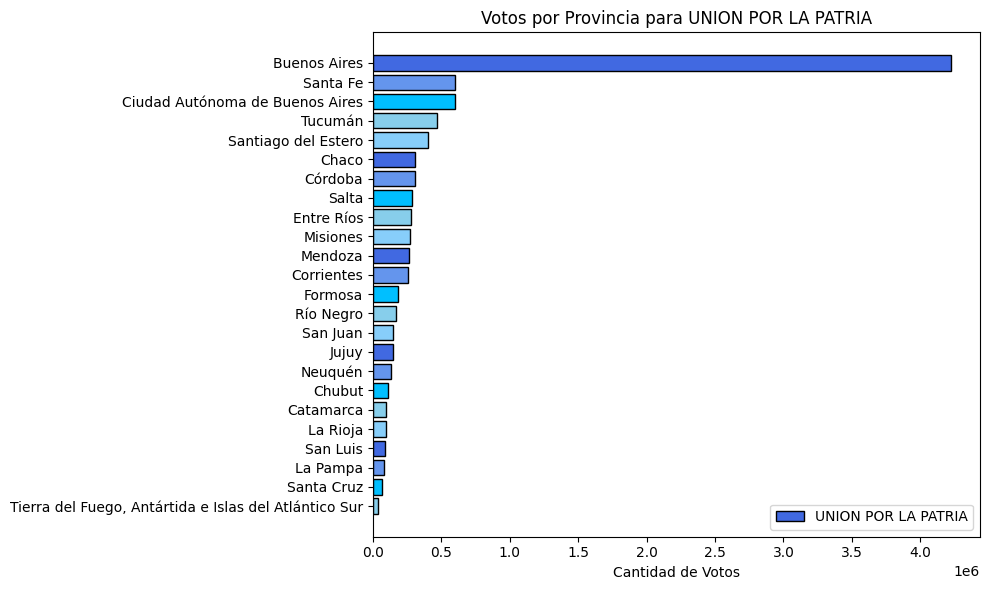

In [25]:
results = df_presi[['distrito_nombre','agrupacion_nombre','votos_cantidad']]
results = round(results.groupby(['distrito_nombre','agrupacion_nombre'])['votos_cantidad'].sum().unstack(fill_value=0),3)

results_upp = results['UNION POR LA PATRIA'].reset_index().set_index('distrito_nombre').sort_values('UNION POR LA PATRIA',ascending=False)
index_upp = results_upp.index.tolist()
results_upp = results_upp.T

# ya tienemos los datos en 'results_upp'

# Transponer los datos para prepararlos para la gráfica de barras de progreso
results_upp = results_upp.T

plt.figure(figsize=(10, 6))

# Obtener el número de provincias
num_provincias = len(results_upp)

# Lista de colores azules
colors = ['royalblue', 'cornflowerblue', 'deepskyblue', 'skyblue', 'lightskyblue']

# Crear barras de progreso
for i, (index, row) in enumerate(results_upp.iterrows()):
    plt.barh(index, row, color=colors[i % len(colors)], edgecolor='black')

# Configuración del gráfico
plt.xlabel('Cantidad de Votos')
plt.title('Votos por Provincia para UNION POR LA PATRIA')
plt.legend(results_upp.columns, loc='lower right')
plt.gca().invert_yaxis()
plt.tight_layout()

plt.show()

In [26]:
#este código procesa los datos de votos para las agrupaciones en diferentes distritos o provincias, 
#centrándose específicamente en los votos de la agrupación 'UNION POR LA PATRIA' 
#y calculando su porcentaje en relación con el total de votos.

results_1 = df_presi[['distrito_nombre','agrupacion_nombre','votos_cantidad']]
results_1 = round(results_1.groupby(['distrito_nombre','agrupacion_nombre'])['votos_cantidad'].sum().unstack(fill_value=0),3)
results_upp = results_1['UNION POR LA PATRIA'].reset_index().set_index('distrito_nombre').sort_values('UNION POR LA PATRIA',ascending=False)
results_upp = round(results_upp.div(results_1.sum().sum())*100,3)
results_upp = results_upp.T

<Figure size 1000x600 with 0 Axes>

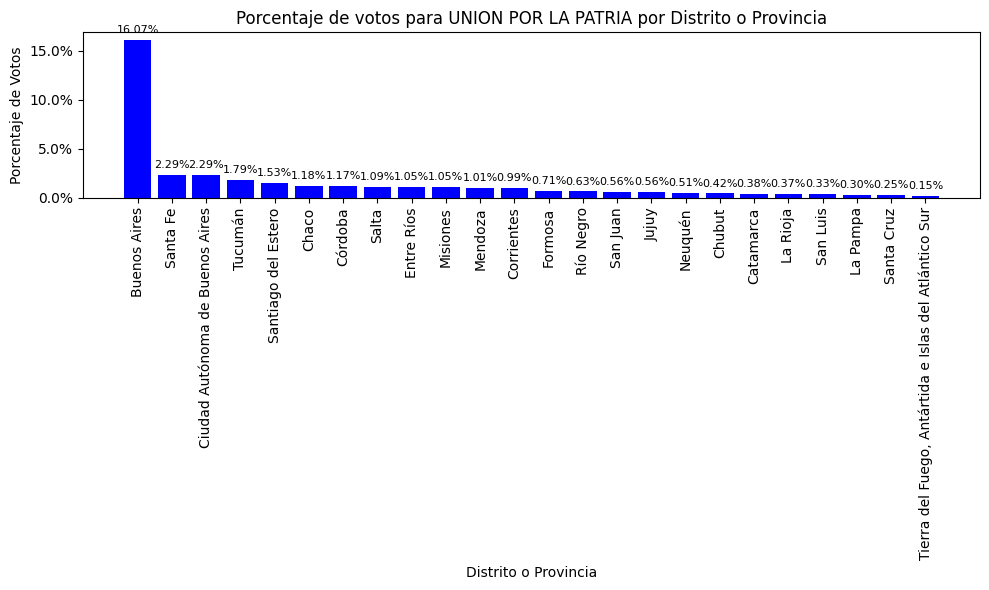

In [27]:

# Suponiendo que 'results_upp' contiene los datos procesados de porcentajes de votos

# Obtener los datos procesados
data = results_upp

plt.figure(figsize=(10, 6))

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

data = results_upp

plt.figure(figsize=(10, 6))

# Crear la gráfica de barras para los porcentajes
bars = plt.bar(data.columns, data.values.flatten(), color='blue')  # Usar azul para las barras

# Configuración del gráfico
plt.xlabel('Distrito o Provincia')
plt.ylabel('Porcentaje de Votos')
plt.title('Porcentaje de votos para UNION POR LA PATRIA por Distrito o Provincia')
plt.xticks(rotation=90)  # Rotar etiquetas del eje x si es necesario

# Agregar porcentajes en la escala del eje y
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

# Mostrar valores en las barras
for bar, val in zip(bars, data.values.flatten()):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{val:.2f}%', ha='center', va='bottom', color='black', fontsize=8)

plt.tight_layout()
plt.show()




<div style="background:#ffbf00;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
<strong>
        <h4 style = "color:#fff"><font size = 5>Resultados por agrupación: Juntos por el cambio</font></h4>
  </strong>
</div><br>

In [34]:
results_jxc = results['JUNTOS POR EL CAMBIO'].reset_index().set_index('distrito_nombre').sort_values('JUNTOS POR EL CAMBIO',ascending=False)
index_jxc = results_jxc.index.tolist()
results_jxc = results_jxc.T


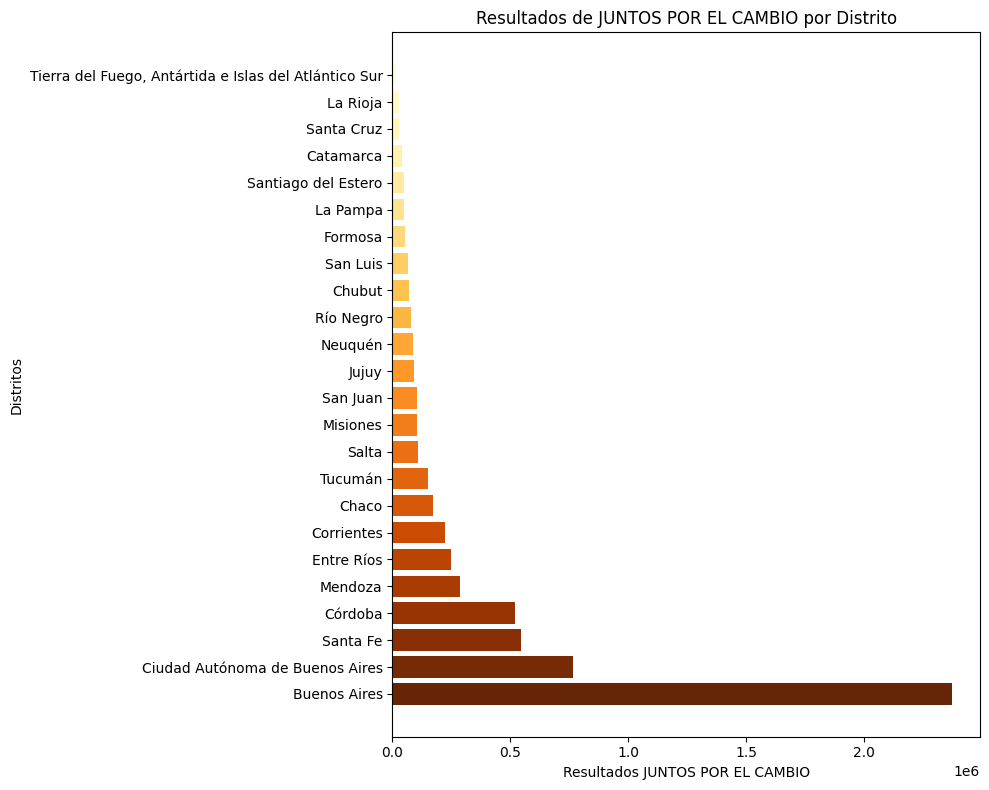

In [35]:

distritos = results_jxc.columns.tolist()
resultados = results_jxc.values[0]  # Se asume una única fila de datos para JUNTOS POR EL CAMBIO

# Crear una paleta de colores invertida para las barras
colores = plt.cm.YlOrBr([1 - i / float(len(distritos)) for i in range(len(distritos))])

# Generar el gráfico de barras horizontal con la paleta invertida
plt.figure(figsize=(10, 8))
plt.barh(distritos, resultados, color=colores)

# Añadir etiquetas y título
plt.xlabel('Resultados JUNTOS POR EL CAMBIO')
plt.ylabel('Distritos')
plt.title('Resultados de JUNTOS POR EL CAMBIO por Distrito')

# Mostrar el gráfico
plt.tight_layout()
plt.show()




In [36]:
results_2 = df_presi[['distrito_nombre','agrupacion_nombre','votos_cantidad']]
results_2 = round(results_2.groupby(['distrito_nombre','agrupacion_nombre'])['votos_cantidad'].sum().unstack(fill_value=0),3)
results_jxc = results_2['JUNTOS POR EL CAMBIO'].reset_index().set_index('distrito_nombre').sort_values('JUNTOS POR EL CAMBIO',ascending=False)
results_jxc = round(results_jxc.div(results_2.sum().sum())*100,3)
results_jxc = results_jxc.T

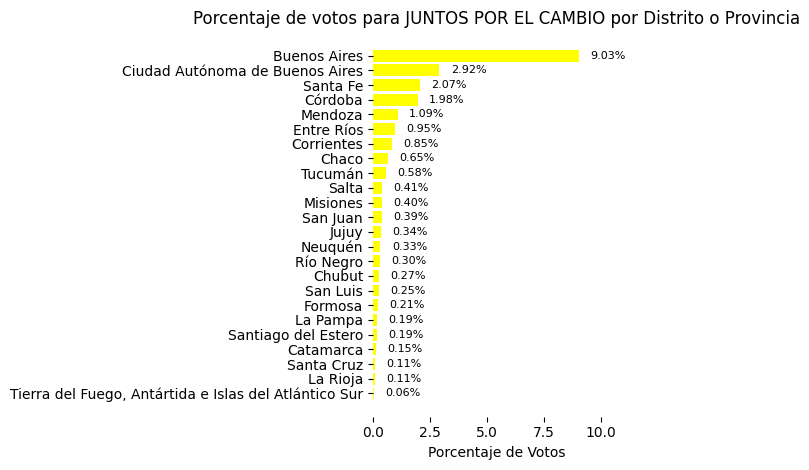

In [37]:

data = results_jxc

# Crear la gráfica de barras en color amarillo
bars = plt.barh(data.columns, data.values.flatten(), color='yellow')  # Usar amarillo para las barras

# Añadir etiquetas con porcentajes a las barras con un offset adecuado
for bar, value in zip(bars, data.values.flatten()):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2, f'{value:.2f}%', va='center', fontsize=8)

# Ajustar límites y espacios
plt.xlim(0, max(data.values.flatten()) * 1.2)  # Ajustar límite derecho del eje x para evitar que se corte la etiqueta
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar el orden de arriba a abajo
plt.xlabel('Porcentaje de Votos')
plt.title('Porcentaje de votos para JUNTOS POR EL CAMBIO por Distrito o Provincia')

# Quitar bordes del gráfico
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()




<div style="background:	#78288C;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
<strong>
        <h4 style = "color:#fff"><font size = 5>Resultados por agrupación: La libertad avanza</font></h4>
  </strong>
</div><br>

In [38]:
results_lla = results['LA LIBERTAD AVANZA'].reset_index().set_index('distrito_nombre').sort_values('LA LIBERTAD AVANZA',ascending=False)
index_lla = results_lla.index.tolist()
results_lla = results_lla.T

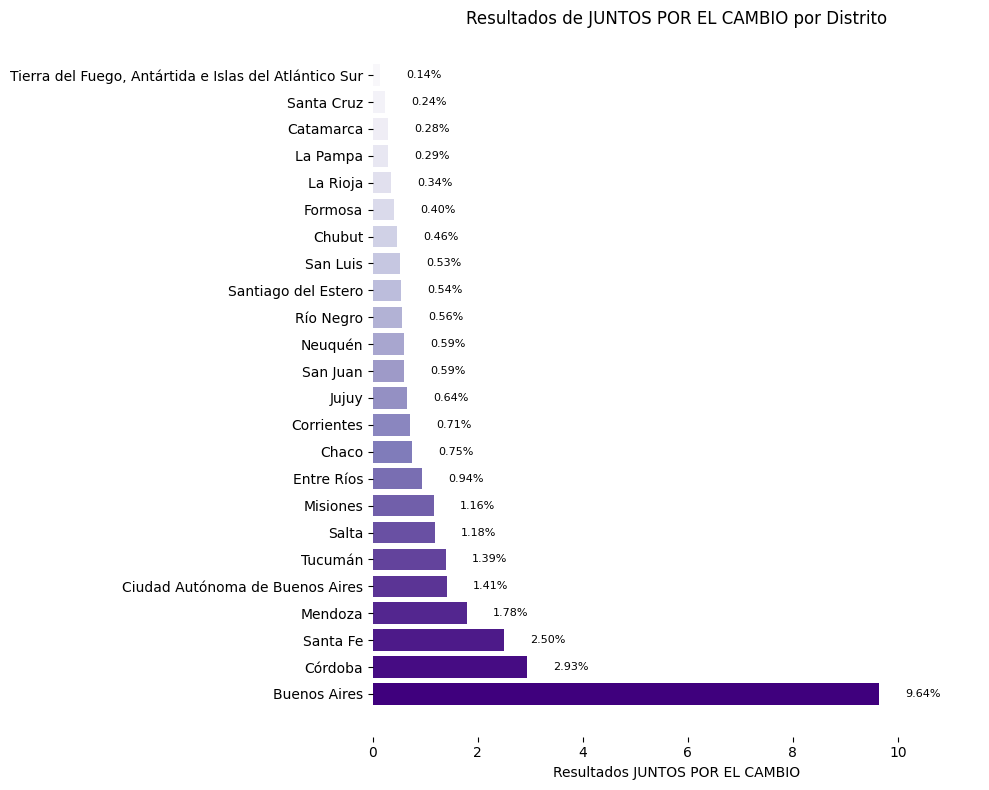

In [72]:

distritos = results_lla.columns.tolist()
resultados = results_lla.values[0]  # Se asume una única fila de datos para JUNTOS POR EL CAMBIO

# Crear una paleta de colores en tonos violetas invertida
colores = plt.cm.Purples([1 - i / float(len(distritos)) for i in range(len(distritos))])

# Generar el gráfico de barras horizontal con la paleta de colores invertida
plt.figure(figsize=(10, 8))
bars = plt.barh(distritos, resultados, color=colores)

# Añadir etiquetas con porcentajes a las barras con un offset adecuado
for bar, value in zip(bars, resultados):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2, f'{value:.2f}%', va='center', fontsize=8)

# Ajustar límites y espacios
plt.xlim(0, max(resultados) * 1.2)  # Ajustar límite derecho del eje x para evitar que se corte la etiqueta
plt.xlabel('Resultados JUNTOS POR EL CAMBIO')
plt.title('Resultados de JUNTOS POR EL CAMBIO por Distrito')

# Quitar bordes del gráfico
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()





In [39]:
results_3 = df_presi[['distrito_nombre','agrupacion_nombre','votos_cantidad']]
results_3 = round(results_3.groupby(['distrito_nombre','agrupacion_nombre'])['votos_cantidad'].sum().unstack(fill_value=0),3)
results_lla = results_3['LA LIBERTAD AVANZA'].reset_index().set_index('distrito_nombre').sort_values('LA LIBERTAD AVANZA',ascending=False)
results_lla = round(results_lla.div(results_3.sum().sum())*100,3)
results_lla = results_lla.T

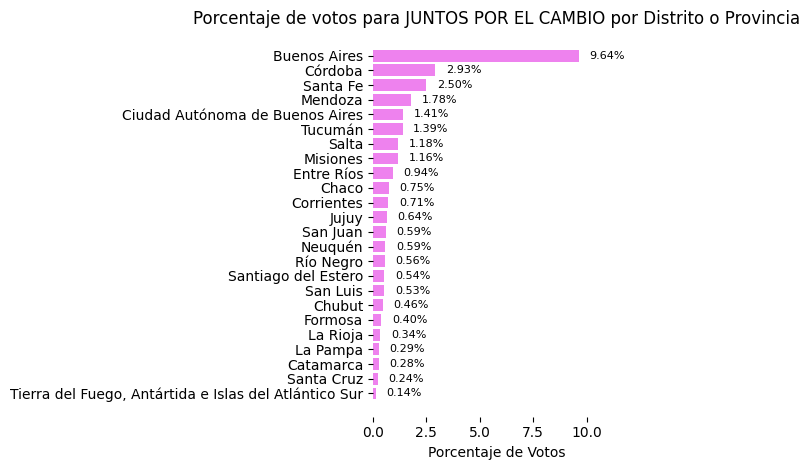

In [40]:
data = results_lla

# Crear la gráfica de barras en color amarillo
bars = plt.barh(data.columns, data.values.flatten(), color='violet')  # Usar amarillo para las barras

# Añadir etiquetas con porcentajes a las barras con un offset adecuado
for bar, value in zip(bars, data.values.flatten()):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2, f'{value:.2f}%', va='center', fontsize=8)

# Ajustar límites y espacios
plt.xlim(0, max(data.values.flatten()) * 1.2)  # Ajustar límite derecho del eje x para evitar que se corte la etiqueta
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar el orden de arriba a abajo
plt.xlabel('Porcentaje de Votos')
plt.title('Porcentaje de votos para JUNTOS POR EL CAMBIO por Distrito o Provincia')

# Quitar bordes del gráfico
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()

<div style="background:	#c72e57;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
<strong>
        <h4 style = "color:#fff"><font size = 5>6. Mapa de votos por provincia</font></h4>
  </strong>
</div><br>

In [37]:
#Armamos un nuevo dataframe

import pandas as pd

# Suponiendo que df_presi contiene tus datos
# Asegúrate de que las columnas existen en tu DataFrame

# Agrupar por 'distrito_nombre' (asumiendo que esta columna contiene las provincias) y sumar los votos
df_provincias_votos= df_presi.groupby('distrito_nombre')['votos_cantidad'].sum().reset_index()

# Renombrar la columna de votos sumados como 'CantidadVotos'
df_provincias_votos = df_provincias_votos.rename(columns={'votos_cantidad': 'CantidadVotos', 'distrito_nombre': 'nombres_provincias' })

In [43]:
df_provincias_votos.loc[df_provincias_votos['nombres_provincias'] == 'Tierra del Fuego, Antártida e Islas del Atlántico Sur', 'nombres_provincias'] = 'Tierra del Fuego'
df_provincias_votos = df_provincias_votos[df_provincias_votos['nombres_provincias'] != 'Ciudad Autónoma de Buenos Aires']
print (df_provincias_votos)

     nombres_provincias  CantidadVotos
0          Buenos Aires       10199399
1             Catamarca         247986
2                 Chaco         724566
3                Chubut         353825
5            Corrientes         714443
6               Córdoba        2332248
7            Entre Ríos         879653
8               Formosa         364755
9                 Jujuy         463017
10             La Pampa         232000
11             La Rioja         242363
12              Mendoza        1142804
13             Misiones         750671
14              Neuquén         442495
15            Río Negro         459214
16                Salta         782342
17             San Juan         455037
18             San Luis         328355
19           Santa Cruz         186441
20             Santa Fe        2070486
21  Santiago del Estero         628087
22     Tierra del Fuego         109652
23              Tucumán        1079405


In [39]:
# We read the file and print it.
geoJSON_df = gpd.read_file('ProvinciasArgentina.geojson')
geoJSON_df.head()

,nombre,geometry
0,Tucumán,"POLYGON ((-66.20361 -26.62782, -66.04980 -26.6..."
1,Santiago del Estero,"POLYGON ((-64.42108 -26.28356, -65.03906 -27.8..."
2,Salta,"POLYGON ((-66.11572 -26.21459, -65.85205 -26.3..."
3,Jujuy,"POLYGON ((-67.22534 -23.69483, -66.47827 -24.2..."
4,Formosa,"POLYGON ((-62.35840 -24.08659, -58.40332 -26.8..."


In [40]:
prov_geo = 'ProvinciasArgentina.geojson'

In [41]:
geoJSON_df = gpd.read_file(prov_geo)
geoJSON_df.head()

,nombre,geometry
0,Tucumán,"POLYGON ((-66.20361 -26.62782, -66.04980 -26.6..."
1,Santiago del Estero,"POLYGON ((-64.42108 -26.28356, -65.03906 -27.8..."
2,Salta,"POLYGON ((-66.11572 -26.21459, -65.85205 -26.3..."
3,Jujuy,"POLYGON ((-67.22534 -23.69483, -66.47827 -24.2..."
4,Formosa,"POLYGON ((-62.35840 -24.08659, -58.40332 -26.8..."


In [45]:
ARG_state = folium.Map(location=[-26.8083,-65.2176], zoom_start=2)
folium.Choropleth(
    geo_data = prov_geo,                  #json
    name ='choropleth',                  
    data = df_provincias_votos,                     
    columns = ['nombres_provincias', 'CantidadVotos'], #columns to work on
    key_on ='feature.properties.nombre',
    fill_color ='YlOrRd',     #I passed colors Yellow,Green,Blue
    fill_opacity = 0.6,
    line_opacity = 0.5,
    #threshold_scale=[0, 10, 20, 30, 100, 200, 300, 500],
    legend_name = "CantidadVotos").add_to(ARG_state)
ARG_state

<div style="background:#c72e57;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h4 style="color:#fff"><font size="5">6. Resumen de los datos</font></h4>
    </strong>
</div>
<br>
<body>
   <h3></h3>
    <ul>
        <li>Popularidad de las agrupaciones: Observamos una clara diferencia en la cantidad de votos entre las agrupaciones. "Unión por la Patria" lidera con una cantidad significativamente mayor de votos en comparación con el resto de los partidos listados.</li>
        <li>Distribución de votos: Existe una brecha notable entre la agrupación que tiene la mayor cantidad de votos y las demás. Esto podría indicar una disparidad en el apoyo popular o en la percepción de las diferentes agrupaciones por parte de los votantes.</li>
        <li>Diversidad política: La presencia de diferentes agrupaciones con cantidades de votos variables sugiere una diversidad de preferencias políticas entre los votantes. Esto refleja la pluralidad de opiniones y la variedad de opciones políticas que los ciudadanos consideran.</li>
        <li>Posibles tendencias o alianzas: Dependiendo del contexto político, estas cifras podrían indicar tendencias o alianzas estratégicas. Por ejemplo, una agrupación con una cantidad sustancialmente menor de votos podría estar buscando alianzas con otras agrupaciones para aumentar su influencia.</li>
        <li>En resumen, estos datos brindan una visión general de la distribución de votos entre diferentes agrupaciones políticas, lo que puede ofrecer información valiosa sobre la dinámica política y las preferencias de los votantes en ese contexto específico.</li>
    </ul>
</body>

